In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataW = pd.read_csv (r'dataW.csv')

In [3]:
dataW

,Country Name,Year,Energy Production Quad BTU,GDP
0,Afghanistan,1980,0.072561,3.641723e+09
1,Algeria,1980,2.803017,4.234638e+10
2,Angola,1980,0.335098,5.930503e+09
3,Argentina,1980,1.597946,7.696192e+10
4,Australia,1980,3.722297,1.499840e+11
...,...,...,...,...
5952,Uzbekistan,2021,1.983724,6.923890e+10
5953,Vanuatu,2021,0.000116,9.563327e+08
5954,Vietnam,2021,2.713688,3.661380e+11
5955,Zambia,2021,0.170076,2.214763e+10


In [4]:
dataW.dtypes

Country Name                   object
Year                            int64
Energy Production Quad BTU    float64
GDP                           float64
dtype: object

In [5]:
from sklearn import tree

In [6]:
X = dataW.iloc[:,3].values.reshape(-1,1) #GDP will be X to use predict the Y Energy Production

In [7]:
X

array([[3.64172332e+09],
       [4.23463808e+10],
       [5.93050340e+09],
       ...,
       [3.66138000e+11],
       [2.21476347e+10],
       [2.83712387e+10]])

In [8]:
X.shape

(5957, 1)

In [9]:
Y = dataW.iloc[:,2].values.reshape(-1,1) 

In [10]:
Y

array([[0.07256116],
       [2.80301736],
       [0.33509804],
       ...,
       [2.7136884 ],
       [0.17007611],
       [0.11629721]])

In [11]:
Y.shape

(5957, 1)

Text(0, 0.5, 'Energy Production Quad BTU')

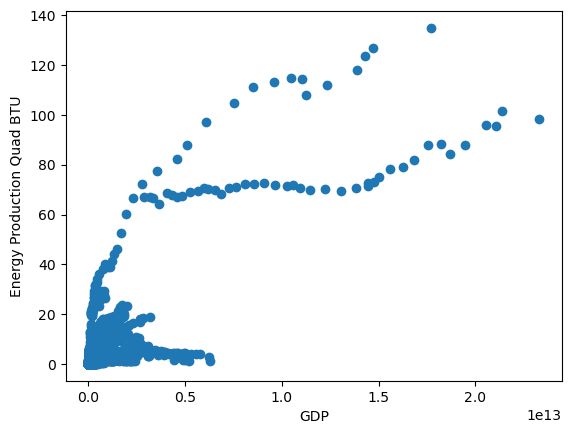

In [12]:
plt.scatter(X,Y)
plt.xlabel('GDP')
plt.ylabel('Energy Production Quad BTU')

In [13]:
dtMD2 = tree.DecisionTreeRegressor(max_depth=2)
modelDT2 = dtMD2.fit(X,Y)


scoreDT2 = modelDT2.score(X,Y)

In [14]:
scoreDT2

0.6984396191628722

Text(0, 0.5, 'Energy Production Quad BTU')

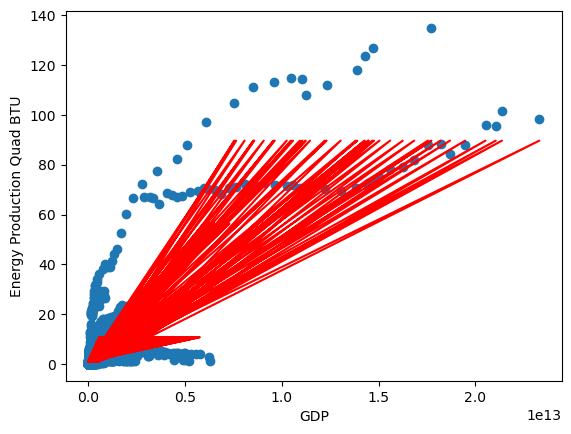

In [15]:
yPredDT2 = modelDT2.predict(X)
plt.scatter(X,Y)
plt.plot(X,yPredDT2,color='red')
plt.xlabel('GDP')
plt.ylabel('Energy Production Quad BTU')

In [16]:
dtMD5 = tree.DecisionTreeRegressor(max_depth=5)
modelDT5 = dtMD5.fit(X,Y)


scoreDT5 = modelDT5.score(X,Y)


In [17]:
scoreDT5

0.7710485794138202

Text(0, 0.5, 'Energy Production Quad BTU')

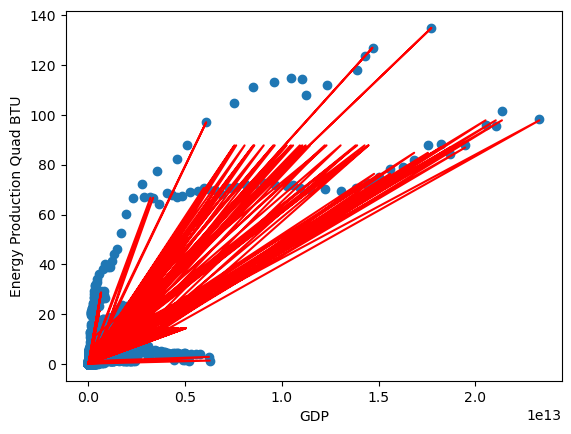

In [18]:
yPredDT5 = modelDT5.predict(X)
plt.scatter(X,Y)
plt.plot(X,yPredDT5,color='red')
plt.xlabel('GDP')
plt.ylabel('Energy Production Quad BTU')

In [19]:
#Training model

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.3,random_state = 4444 )

Text(0, 0.5, 'Energy Production Quad BTU')

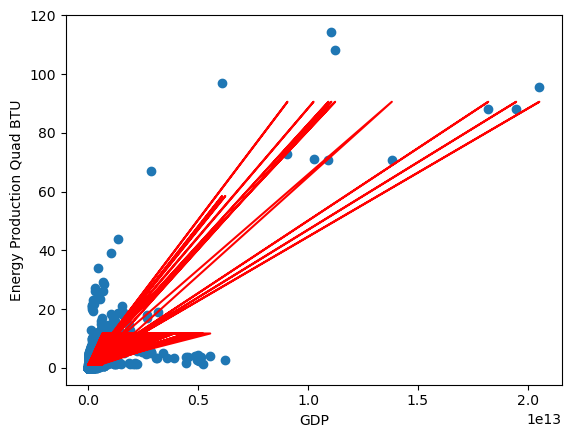

In [22]:
dtMD2 = tree.DecisionTreeRegressor(max_depth=2)
modelDT2 = dtMD2.fit(X_train,Y_train)
Y2_train_pred = modelDT2.predict(X_train)
Y2_test_pred = modelDT2.predict(X_test)
plt.scatter(X_test,Y_test)
plt.plot(X_test,Y2_test_pred,color='red')
plt.xlabel('GDP')
plt.ylabel('Energy Production Quad BTU')


In [23]:
modelDT2.score(X_test,Y_test)

0.7047547043278175

Text(0, 0.5, 'Energy Production Quad BTU')

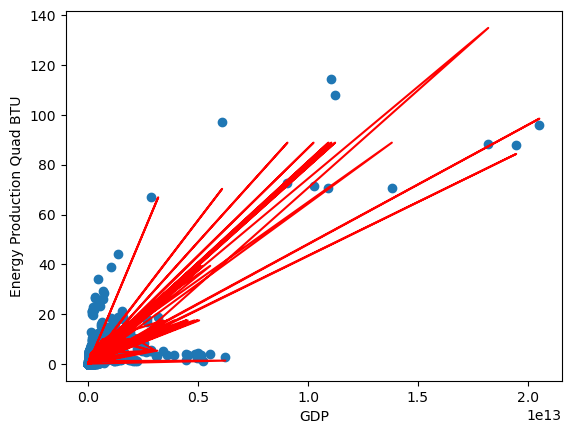

In [29]:
dtMD5 = tree.DecisionTreeRegressor(max_depth=5)
modelDT5 = dtMD5.fit(X_train,Y_train)
Y5_train_pred = modelDT5.predict(X_train)
Y5_test_pred = modelDT5.predict(X_test)
plt.scatter(X_test,Y_test)
plt.plot(X_test,Y5_test_pred,color='red')
plt.xlabel('GDP')
plt.ylabel('Energy Production Quad BTU')

In [30]:
modelDT5.score(X_test,Y_test)

0.6864628071656389

Text(0, 0.5, 'Energy Production Quad BTU')

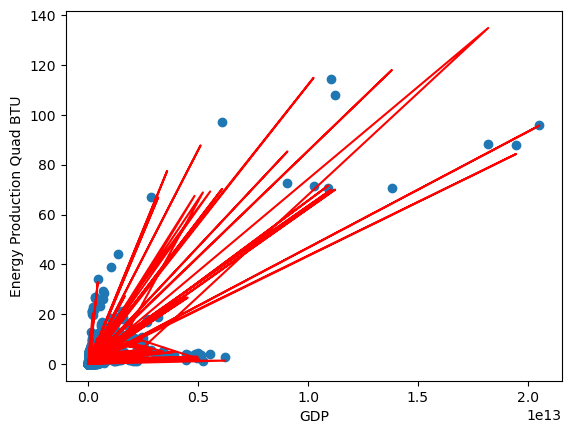

In [31]:
dtMD10 = tree.DecisionTreeRegressor(max_depth=10)
modelDT10 = dtMD10.fit(X_train,Y_train)
Y10_train_pred = modelDT10.predict(X_train)
Y10_test_pred = modelDT10.predict(X_test)
plt.scatter(X_test,Y_test)
plt.plot(X_test,Y10_test_pred,color='red')
plt.xlabel('GDP')
plt.ylabel('Energy Production Quad BTU')

In [32]:
modelDT10.score(X_test,Y_test)

0.40480795526320135

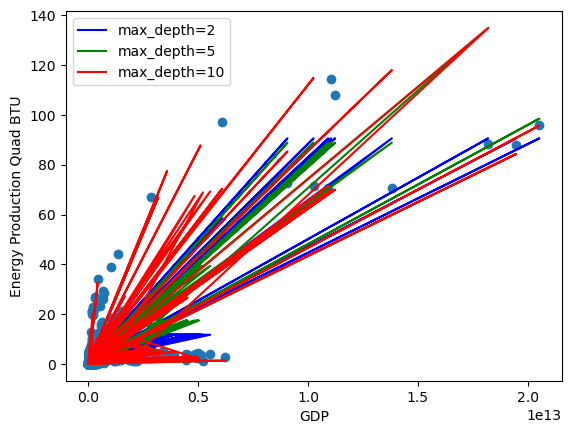

In [33]:
plt.figure()
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y2_test_pred, color="blue", label="max_depth=2")
plt.plot(X_test, Y5_test_pred, color="green", label="max_depth=5")
plt.plot(X_test, Y10_test_pred, color="red", label="max_depth=10")
plt.xlabel('GDP')
plt.ylabel('Energy Production Quad BTU')
plt.legend()
plt.show()